### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [774]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [775]:
import warnings
warnings.filterwarnings('ignore')

# display number formatted with two decimal places
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# set pd random state
np.random.seed(42)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [776]:
data = pd.read_csv('data/coupons.csv')

In [777]:
# data.head()

In [778]:
data.shape

(12684, 26)

Fix a spelling error in column name

In [779]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)

Find the number of categorical/number columns

In [780]:
data.dtypes.reset_index().groupby(0).size()

0
int64      8
object    18
dtype: int64

Find high-cardinality categorical variables 

             col_name  max_freq
20   toCoupon_GEQ5min    100.00
22  toCoupon_GEQ25min     88.09
2             weather     79.38
24      direction_opp     78.52
23     direction_same     78.52


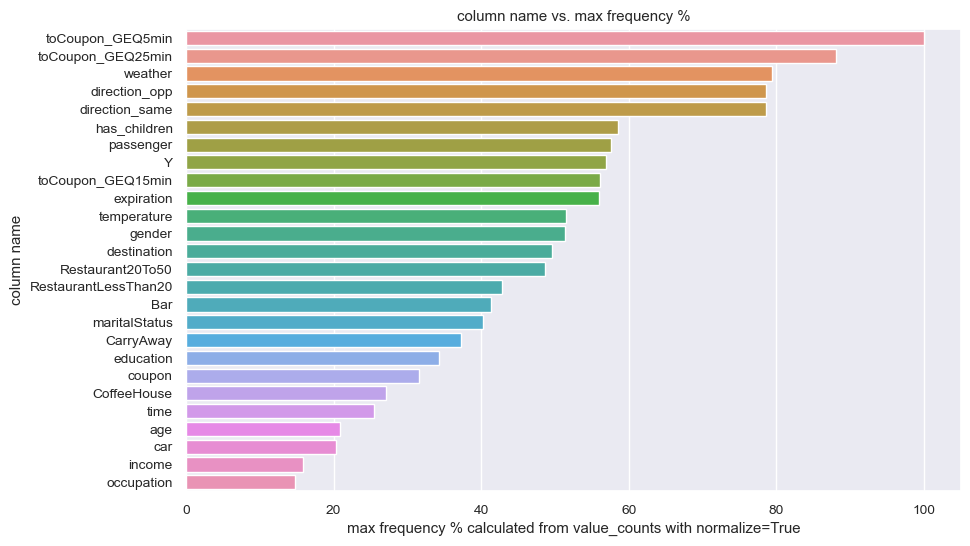

      col_name  cardinality
12  occupation           25
13      income            9
8          age            8
11   education            6
14         car            5


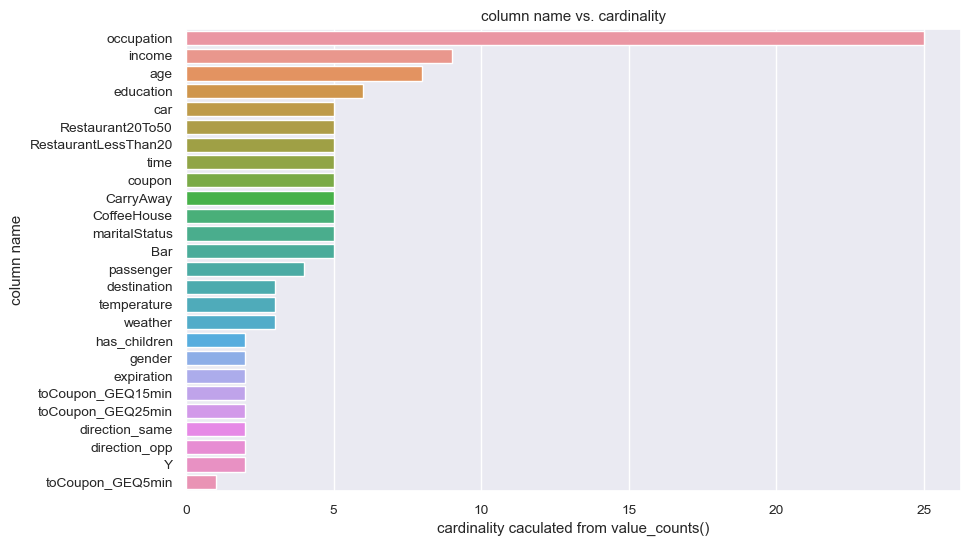

In [781]:
col_max_freq, col_card = {}, {}

for col in data.columns:
    # get value frequency
    freq = data[col].value_counts(dropna=True, normalize=True).reset_index() 
    col_max_freq[col] = freq.proportion.max()
    col_card[col] = freq.proportion.count()
    
df_col_max_freq = pd.DataFrame.from_dict(col_max_freq, orient='index').reset_index()
df_col_max_freq = df_col_max_freq.rename(columns={'index': 'col_name', 0: 'max_freq'})
df_col_max_freq = df_col_max_freq.sort_values('max_freq', ascending=False)
df_col_max_freq.max_freq = df_col_max_freq.max_freq * 100.0
print(df_col_max_freq.head(5)) # top 5

plt.figure(figsize=(10 ,6)) 
fig = sns.barplot(df_col_max_freq, y='col_name', x='max_freq',  orient='h')
plt.xlabel(f'max frequency % calculated from value_counts with normalize=True')
plt.ylabel('column name')
plt.title(f'column name vs. max frequency %')
plt.savefig('images/column_name_vs_max_frequency.png')
plt.show()

df_col_card = pd.DataFrame.from_dict(col_card, orient='index').reset_index()
df_col_card = df_col_card.rename(columns={'index': 'col_name', 0: 'cardinality'})
df_col_card = df_col_card.sort_values('cardinality', ascending=False)
print(df_col_card.head(5)) # top 5

plt.figure(figsize=(10 ,6)) 
fig = sns.barplot(df_col_card, y='col_name', x='cardinality', orient='h')
plt.xlabel('cardinality caculated from value_counts()')
plt.ylabel('column name')
plt.title(f'column name vs. cardinality')
plt.savefig('images/column_name_vs_cardinality.png')
plt.show()

2. Investigate the dataset for missing or problematic data.

Find duplicates

In [782]:
dup_count = data.duplicated().sum()
print('total number of duplicates:', dup_count)
dup_ratio = dup_count / data.shape[0]
print(f'percentage of duplicates: {dup_ratio*100:.2f}%')

total number of duplicates: 74
percentage of duplicates: 0.58%


Find strange min/max
- Not found

Find big diff between mean and median
- Not found

In [783]:
data.select_dtypes(include=['int64', 'float64']).describe(percentiles=[.25, .5, .75])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00
mean,63.30,0.41,1.00,0.56,0.12,0.21,0.79,0.57
std,19.15,0.49,0.00,0.50,0.32,0.41,0.41,0.50
min,30.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,55.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
50%,80.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00
75%,80.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
max,80.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Find strong relationships among numerical columns
- Compute correlation matrix
- Find strong relationship where abs(corr) > threshhold

Strong relationships among columns (threshold=0.7):


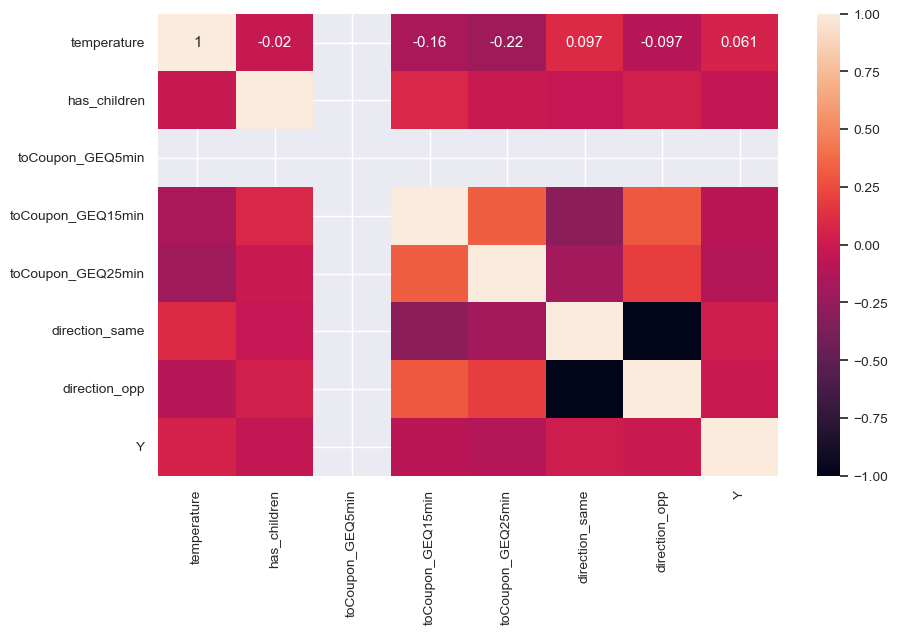

In [784]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
corr = data[numeric_columns].corr()
# print(corr)

# find strong relationships (absolute correlation > ?)
threshold = 0.7
strong_relationships = corr[abs(corr) > threshold]

print(f'Strong relationships among columns (threshold={threshold}):')
# print(strong_relationships)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
sns.set(font_scale=.9)


Find high-cardinality categorical columns
- Calculate the ratio of unique values to total rows
- Check if the raito exceeds the threshhold
- Not found

In [785]:
threshold = 0.5
high_cardinality_columns = []

for col in data.columns:
    # Check if the column is categorical
    if data[col].dtype == 'object':
        # Calculate the ratio of unique values to total rows
        unique_ratio = data[col].nunique() / data.shape[0]
        # Check if the ratio exceeds the threshold
        if unique_ratio > threshold:
            high_cardinality_columns.append(col)

print("High-cardinality categorical columns:")
print(high_cardinality_columns)

High-cardinality categorical columns:
[]


Find categorical variables with large percentages of records having a single value
- `weather`

In [786]:
threshold = 0.75

categorical_large_percentage_single_value = []

for col in data.select_dtypes(include=['object']):
    # Calculate value counts
    value_counts = data[col].value_counts(normalize=True)
    # Check if the percentage of the dominant value exceeds the threshold
    if value_counts.iloc[0] > threshold:
        categorical_large_percentage_single_value.append(col)

print("Categorical variables with large percentages of records having a single value:")
print(categorical_large_percentage_single_value)

data.weather.value_counts()

Categorical variables with large percentages of records having a single value:
['weather']


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

Find relationships between two categorical variables    
- Run `chi-square` test for each pair of categorical columns
- Found too many pairs - the noises

In [787]:
from scipy.stats import chi2_contingency

threshold = 0.05
strong_relationship = []
cols = data.select_dtypes(include=['object']).columns
for i in range(len(cols)):
    col1 = cols[i]
    for j in range(i+1, len(cols)):
        col2 = cols[j]
        contingency_table = pd.crosstab(data[col1], data[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        if p < threshold:
            strong_relationship.append([col1, col2])
print(f'Number of strong relationship found: {len(strong_relationship)}')
print(f'First 20 strong relationship:')
for x, y in strong_relationship[:20]:
    print(f'[{x}, {y}]')

Number of strong relationship found: 111
First 20 strong relationship:
[destination, passenger]
[destination, weather]
[destination, time]
[destination, coupon]
[destination, expiration]
[destination, maritalStatus]
[destination, occupation]
[destination, income]
[passenger, weather]
[passenger, time]
[passenger, coupon]
[passenger, expiration]
[passenger, gender]
[passenger, age]
[passenger, maritalStatus]
[passenger, education]
[passenger, occupation]
[passenger, income]
[passenger, car]
[passenger, Bar]


Decide what to do about your missing data -- drop, replace, other...
- Fill missing values with the most popular values

In [788]:
cols_w_null = data.isnull().sum().reset_index()
cols_w_null = cols_w_null.rename(columns={'index': 'col_name', 0: 'isnull_sum'})
# print(f'{cols_w_null!r}')
for idx, row in cols_w_null.query('isnull_sum > 0').iterrows():
    col, cnt = row.col_name, row.isnull_sum
    x = cnt / data.shape[0]
    mode = data[col].mode(dropna=True)[0]
    print(f'Percent of missing {col!a} records is {100*x:.2f}%, fill missing value with {mode!r}')
    # The mode of a set of values is the value that appears most often
    data[col].fillna(value=mode, inplace=True)

Percent of missing 'car' records is 99.15%, fill missing value with 'Mazda5'
Percent of missing 'Bar' records is 0.84%, fill missing value with 'never'
Percent of missing 'CoffeeHouse' records is 1.71%, fill missing value with 'less1'
Percent of missing 'CarryAway' records is 1.19%, fill missing value with '1~3'
Percent of missing 'RestaurantLessThan20' records is 1.02%, fill missing value with '1~3'
Percent of missing 'Restaurant20To50' records is 1.49%, fill missing value with 'less1'


Convert categorical columns to numerical values

In [789]:
# frequency
txt = ['never', 'less1', '1~3', '4~8', 'gt8']
rank = [0, 0.5, 2, 6, 9]

data.Bar.replace(txt, rank, inplace=True)
data.CoffeeHouse.replace(txt, rank, inplace=True)
data.CarryAway.replace(txt, rank, inplace=True)
data.RestaurantLessThan20.replace(txt, rank, inplace=True)
data.Restaurant20To50.replace(txt, rank, inplace=True)

# income, use upper bound from range
txt = [
    'Less than $12500',
    '$12500 - $24999', 
    '$25000 - $37499',
    '$37500 - $49999', 
    '$50000 - $62499', 
    '$62500 - $74999',
    '$75000 - $87499', 
    '$87500 - $99999',
    '$100000 or More'
]
rank = [
    12500-1,
    24999, 
    37499,
    49999, 
    62499, 
    74999,
    87499, 
    99999,
    100000+1]
data['income'].replace(txt, rank, inplace=True)

# age
txt = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
rank = [21-1, 21, 26, 31, 36, 41, 46, 50+1]

data['age'].replace(txt, rank, inplace=True)

sampled_df = data[['Bar', 'CoffeeHouse', 'CarryAway', 
                    'RestaurantLessThan20', 'Restaurant20To50',
                    'income', 'age']].sample(n=10)
sampled_df

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,income,age
9849,2.00,6.00,0.50,2.00,0.50,62499,51
8457,0.00,9.00,0.50,2.00,0.50,99999,51
10270,0.00,9.00,6.00,2.00,0.50,37499,31
7852,0.50,0.50,9.00,6.00,0.50,100001,31
2020,0.50,0.00,9.00,6.00,2.00,100001,51
10076,0.00,0.50,6.00,2.00,2.00,87499,31
9611,0.50,0.00,2.00,0.50,0.00,74999,21
5700,6.00,2.00,6.00,6.00,2.00,74999,26
11845,0.50,0.50,2.00,0.00,0.00,37499,26
4077,0.00,0.00,2.00,0.50,0.00,37499,36


Calculate corr and plot heapmap afer converting some categorical columns

<Axes: >

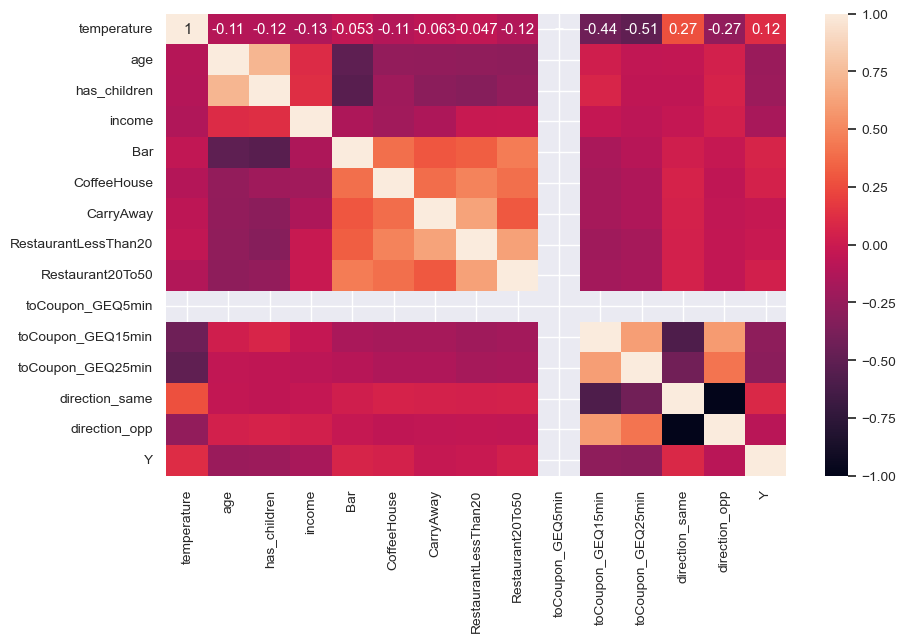

In [790]:
plt.figure(figsize=(10, 6))
df2 = data[data.select_dtypes("number").columns].corr()
fig = sns.heatmap(df2.corr(), annot=True)
fig

4. What proportion of the total observations chose to accept the coupon? 



In [791]:
ans = data.query('Y == 1').shape[0] / data.shape[0] * 100
ans = f'{ans:.2f}%'
print(ans)

56.84%


5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Visualization of "coupon" Column'}, xlabel='Coupon Type', ylabel='Coupon Occurrences'>

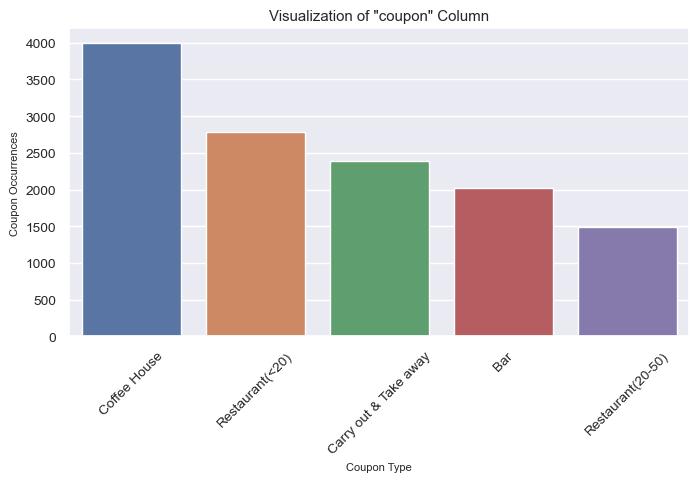

In [792]:
plt.figure(figsize=(8,4))
fig = sns.barplot(x=data.coupon.value_counts().index, y=data.coupon.value_counts())
plt.xticks(rotation=45)
plt.ylabel('Coupon Occurrences', fontsize=8)
plt.xlabel('Coupon Type', fontsize=8)
plt.title('Visualization of "coupon" Column')
plt.savefig('images/bar_coupon.png')
fig

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Temperature Occurrences'>

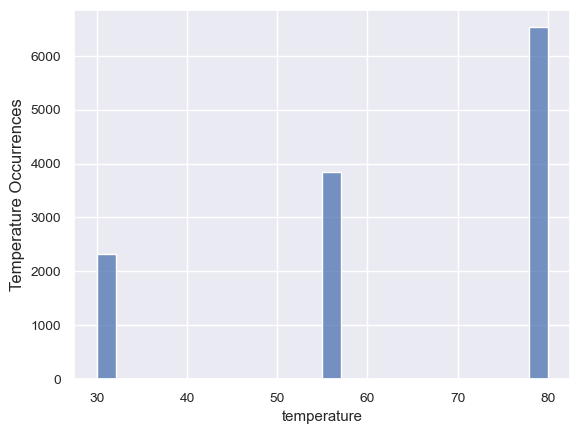

In [793]:
fig = sns.histplot(data.temperature)
plt.ylabel('Temperature Occurrences', fontsize=12)
plt.savefig('images/hist_temperature.png')
fig

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [794]:
df_bar = data.query('coupon == "Bar"')
df_bar.Bar.sample(n=10)

2305    0.00
3323    0.50
1628    2.00
9048    0.00
9061    0.00
8425    6.00
4470    0.50
9972    0.00
11636   0.50
6621    0.00
Name: Bar, dtype: float64

2. What proportion of bar coupons were accepted?


In [795]:
x = df_bar.query('Y == 1').shape[0] / df_bar.shape[0]
ans = f'{x*100:.2f}%'
print(ans)

41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [796]:
x = df_bar.query('Bar <= 3').query('Y == 1').shape[0] \
    / df_bar.query('Bar <= 3').shape[0]
y = df_bar.query('Bar >  3').query('Y == 1').shape[0] \
    / df_bar.query('Bar >  3').shape[0]
ans = {
    'bar_leq3': f'{x*100:.2f}%',
    'bar_gt3':  f'{y*100:.2f}%'
}
print(ans)

{'bar_leq3': '37.07%', 'bar_gt3': '76.88%'}


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [797]:
df2 = df_bar.query('Bar > 1 & age > 25')
df3 = df2.query('Y == 1')
x = df3.shape[0] / df2.shape[0]
ans = f'{x*100:.2f}%'
print(ans)

69.52%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [798]:
q = " Bar > 1 & passenger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry' "
df2 = df_bar.query(q)
df3 = df2.query('Y == 1')
x = df3.shape[0] / df2.shape[0]
ans = f'{x*100:.2f}%'
print(ans)

71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [799]:
queries = [
    " Bar > 1 & passenger != 'Kid(s)' & maritalStatus != 'Widowed' ",
    " Bar > 1 & age < 30 ",
    " RestaurantLessThan20 > 4 & income < 50_000 ",
]
for q in queries:
    df2 = df_bar.query(q)
    df3 = df2.query('Y == 1')
    x = df3.shape[0] / df2.shape[0]
    ans = f'{x*100:.2f}%'
    print(f'{q.strip()}\n  -> acceptance rate: {ans}')

Bar > 1 & passenger != 'Kid(s)' & maritalStatus != 'Widowed'
  -> acceptance rate: 71.32%
Bar > 1 & age < 30
  -> acceptance rate: 72.17%
RestaurantLessThan20 > 4 & income < 50_000
  -> acceptance rate: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

If a driver has a habit of going to the bars, the driver will be more likely to accept the coupon with the observations below,
- Driver is driving with non-kids passenger(s). This can be explained as, acceptance only requires one 'Yes' from all individualsin in the vehicle, however rejection requires everyone responds with 'No'. 
- Driver is a young adult. This matches the findings from from [nih.gov source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6876515/)


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### `Coffee House` coupon Analysis
 
Test some hypotheses:
- CoffeeHouse vs Y
- occupation vs Y
- time vs Y
- expiration vs Y

In [800]:
df_cf = data.query('coupon == "Coffee House"')
print(df_cf.shape)
print(data.shape)
df_cf_1 = df_cf.query('Y==1')
df_cf_0 = df_cf.query('Y==0')
print(df_cf_1.shape)
print(df_cf_0.shape)

(3996, 26)
(12684, 26)
(1995, 26)
(2001, 26)


CoffeeHouse (bar visit frequency) vs Y (acceptance)

<Axes: title={'center': 'CoffeeHouse vs Y'}, xlabel='CoffeeHouse', ylabel='Count'>

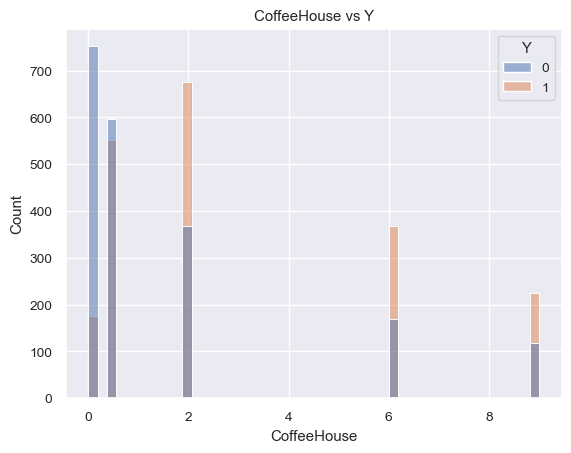

In [801]:
fig = sns.histplot(data=df_cf, x='CoffeeHouse', hue='Y')
plt.title('CoffeeHouse vs Y')
plt.savefig('images/hist_by_CoffeeHouse.png')
fig


   CoffeeHouse  Y_eq_1
0         0.00     175
1         0.50     551
2         2.00     675
3         6.00     369
4         9.00     225
   CoffeeHouse  Y_count
0         0.00      927
1         0.50     1147
2         2.00     1042
3         6.00      538
4         9.00      342
   CoffeeHouse  Y_eq_1  Y_count  acceptance_rate
0         0.00     175      927             0.19
1         0.50     551     1147             0.48
2         2.00     675     1042             0.65
3         6.00     369      538             0.69
4         9.00     225      342             0.66


<Axes: title={'center': 'CoffeeHouse vs Acceptance Rate'}, xlabel='CoffeeHouse', ylabel='acceptance_rate'>

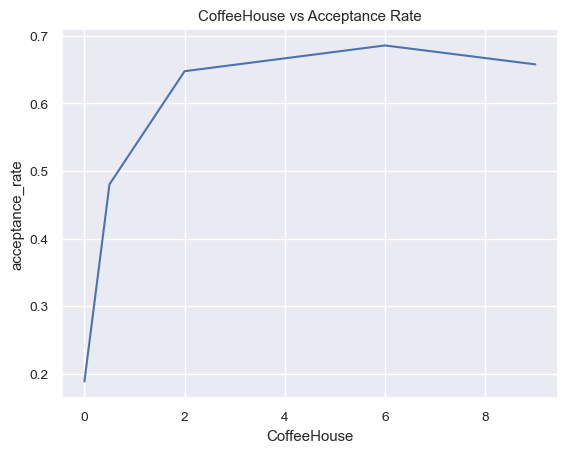

In [802]:
x = df_cf.groupby(['CoffeeHouse']).sum('Y').Y.reset_index(name='Y_eq_1')
print(x)

y = df_cf.groupby(['CoffeeHouse']).size().reset_index(name='Y_count')
print(y)

z = pd.merge(x, y, on='CoffeeHouse')
z['acceptance_rate'] = z.Y_eq_1 / z.Y_count
print(z)

fig = sns.lineplot(data=z, x='CoffeeHouse', y='acceptance_rate')

plt.title('CoffeeHouse vs Acceptance Rate')
plt.savefig('images/CoffeeHouse_acceptance_rate.png')
fig

occupation vs Y (acceptance)

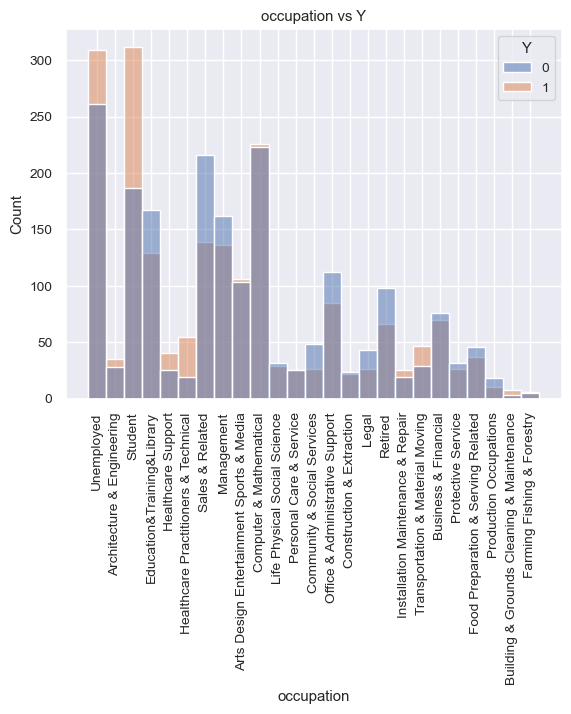

In [803]:
fig = sns.histplot(data=df_cf, x='occupation', hue='Y')
plt.xticks(rotation=90)
plt.title('occupation vs Y')
plt.savefig('images/hist_by_occupation.png')


- expiration vs Y (acceptance)

<Axes: title={'center': 'expiration vs Y'}, xlabel='expiration', ylabel='Count'>

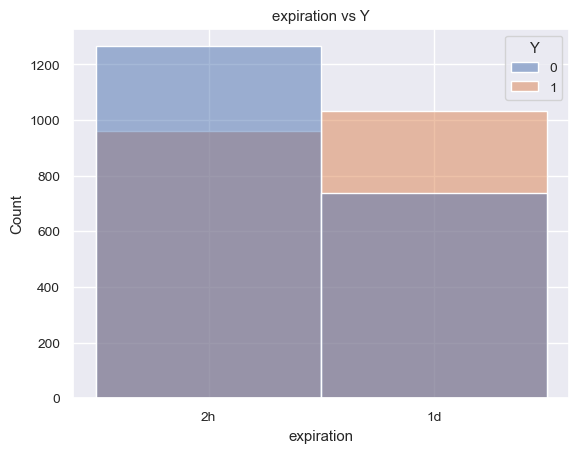

In [804]:
fig = sns.histplot(data=df_cf, x='expiration', hue='Y')
plt.title('expiration vs Y')
plt.savefig('images/hist_by_expiration.png')
fig


time vs Y (acceptance)

<Axes: title={'center': 'time vs Y'}, xlabel='time', ylabel='Count'>

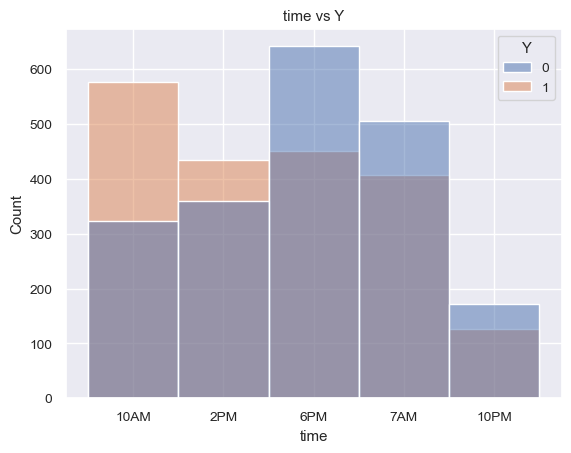

In [805]:
fig = sns.histplot(data=df_cf, x='time', hue='Y')
plt.title('time vs Y')
plt.savefig('images/hist_by_time.png')
fig

A violin plot showing combined factors (bar visit frequency and occupation) and the Y (acceptance)

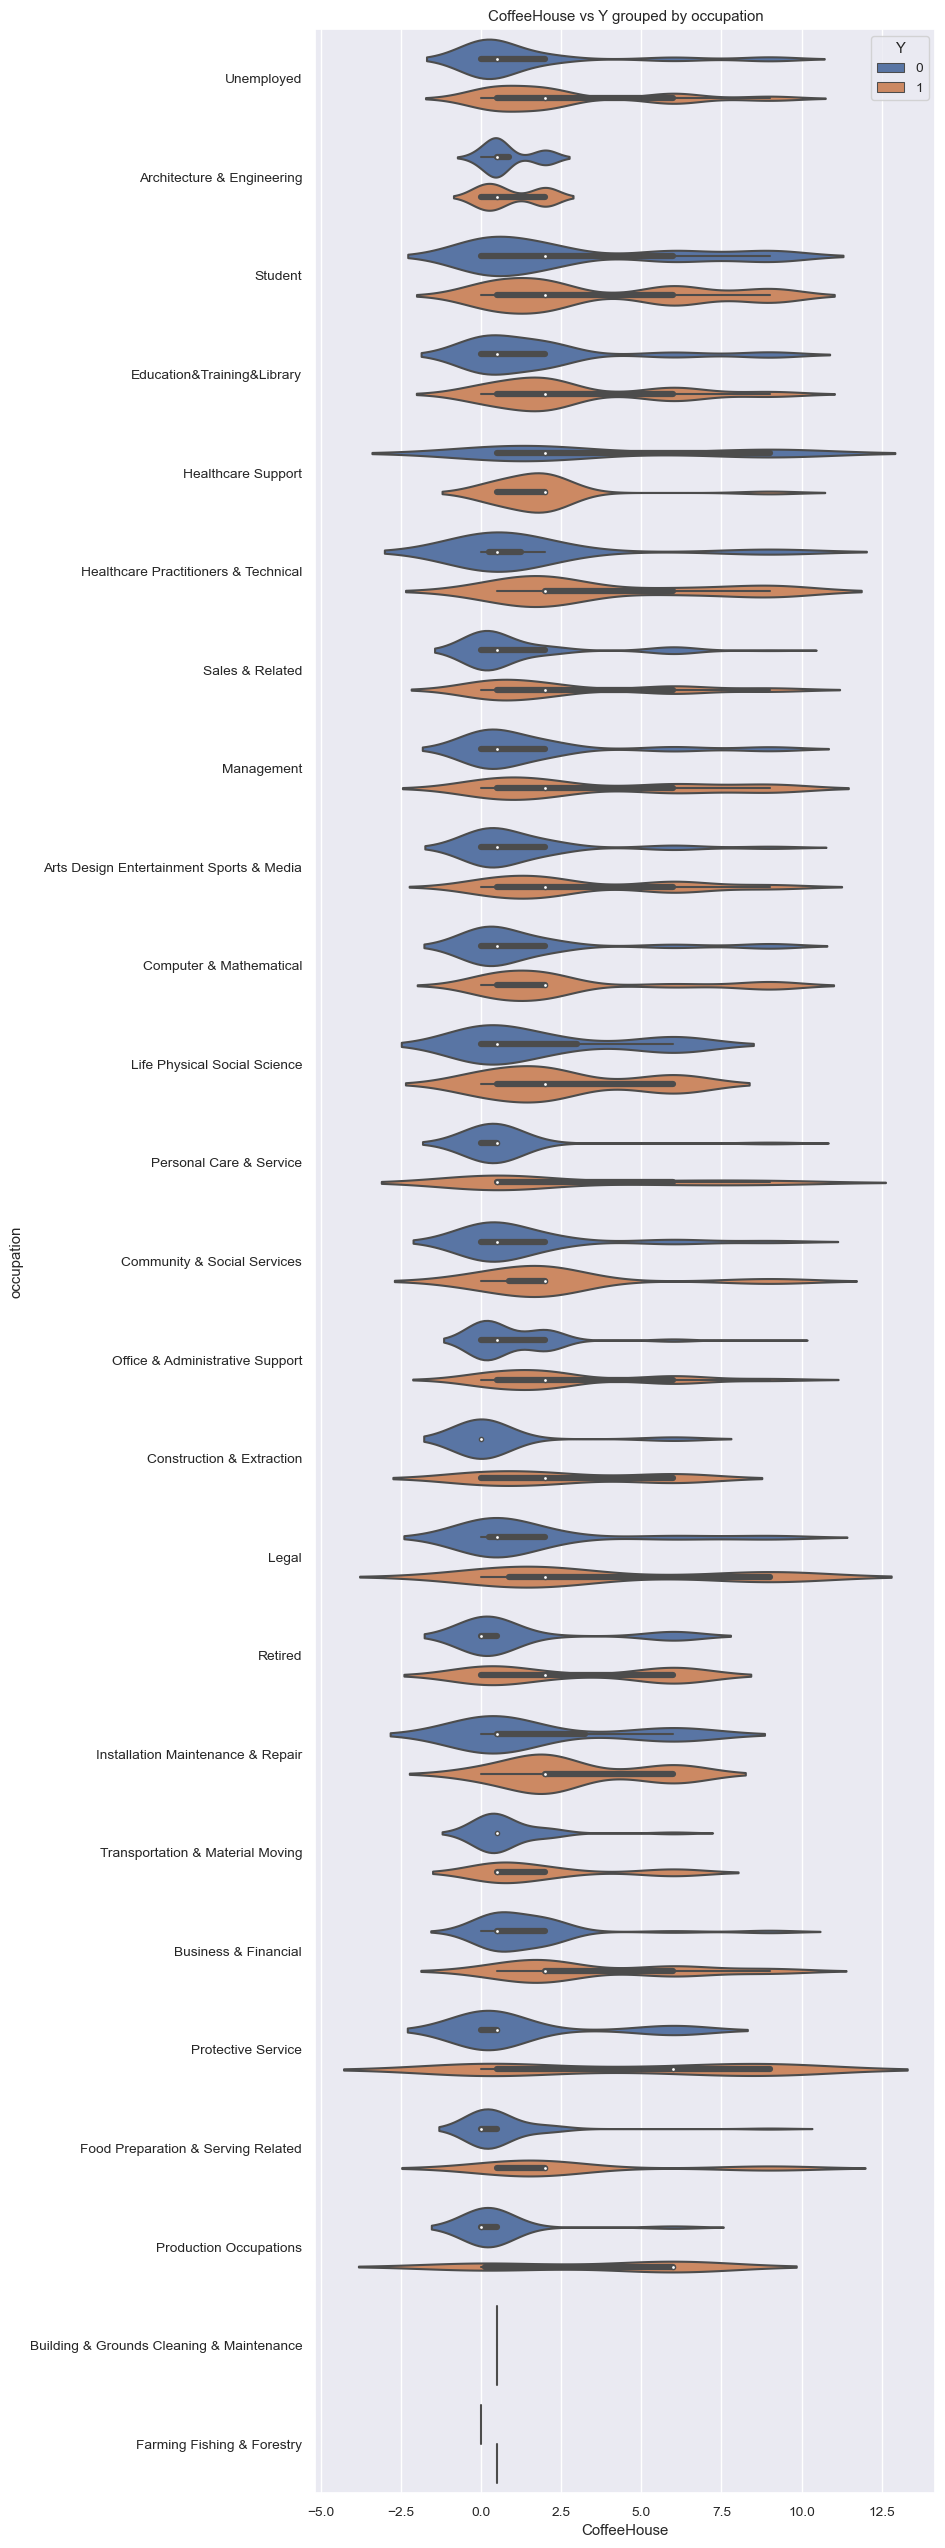

<Axes: title={'center': 'CoffeeHouse vs Y grouped by occupation'}, xlabel='CoffeeHouse', ylabel='occupation'>

In [806]:
plt.figure(figsize=(8, 32))
fig = sns.violinplot(data=df_cf, x='CoffeeHouse', y='occupation', hue='Y', orient='h')
plt.title('CoffeeHouse vs Y grouped by occupation')
plt.savefig('images/violin_by_CoffeHouse_occupation_time.png')
plt.show()
fig